In [226]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
import seaborn as sns

/kaggle/input/coviddata/CovidDeaths.csv


In [227]:
df=pd.read_csv('/kaggle/input/coviddata/CovidDeaths.csv')

# EDA

In [228]:
# Shape of the dataset
print(df.shape)

(85171, 52)


In [229]:
# Getting list of all columns present in the dataframe
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       

In [230]:
#selecting useful columns
cols=['continent', 'location', 'date', 'total_cases','new_cases','total_deaths', 'icu_patients','hosp_patients', 
      'new_tests', 'total_tests', 'total_vaccinations','people_vaccinated', 'population', 
      'population_density', 'median_age', 'aged_65_older','aged_70_older', 'gdp_per_capita', 
      'extreme_poverty','cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers','male_smokers']

data=df[cols]

# You can drop unwanted columns also: data.drop(cols,axis=1 inpace=True)

In [231]:
data.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'icu_patients', 'hosp_patients', 'new_tests',
       'total_tests', 'total_vaccinations', 'people_vaccinated', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers'],
      dtype='object')

In [232]:
data.describe()

,total_cases,new_cases,total_deaths,icu_patients,hosp_patients,new_tests,total_tests,total_vaccinations,people_vaccinated,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
count,8.307200e+04,83070.000000,7.340800e+04,8684.000000,10814.000000,3.894500e+04,3.865200e+04,9.374000e+03,8.744000e+03,8.462200e+04,79274.000000,76706.000000,75830.000000,76276.000000,77046.000000,52449.000000,77634.000000,78779.000000,60828.000000,59931.000000
mean,8.250083e+05,5808.325352,2.300409e+04,1087.808268,4832.767339,4.401999e+04,5.963484e+06,1.448260e+07,8.974136e+06,1.284213e+08,349.043245,30.522465,8.773478,5.557222,19138.882312,13.348729,257.783338,7.820936,10.520272,32.656970
std,5.705959e+06,36285.123205,1.360297e+05,3036.371200,12440.913787,2.280829e+05,2.702657e+07,6.637651e+07,3.793750e+07,6.904393e+08,1699.215916,9.114990,6.224095,4.248993,19821.321091,19.942984,118.765619,3.977056,10.402965,13.475297
min,1.000000e+00,-74347.000000,1.000000e+00,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000e+00,0.000000e+00,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000
25%,9.300000e+02,2.000000,4.500000e+01,31.000000,111.000000,1.433000e+03,1.246390e+05,6.206025e+04,5.225850e+04,2.416664e+06,36.253000,22.000000,3.441000,2.043000,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000
50%,1.042250e+04,70.000000,3.150000e+02,178.000000,679.000000,5.446000e+03,6.207335e+05,4.803760e+05,3.548135e+05,1.009927e+07,82.805000,29.700000,6.378000,3.871000,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000
75%,1.105940e+05,764.000000,3.045000e+03,699.000000,2806.750000,2.157900e+04,2.582847e+06,2.997519e+06,2.108087e+06,3.691056e+07,208.354000,39.100000,14.178000,8.678000,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000
max,1.513995e+08,905992.000000,3.180238e+06,30028.000000,129800.000000,3.202280e+07,4.135027e+08,1.134333e+09,5.952349e+08,7.794799e+09,20546.766000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000


In [233]:
data['location'].nunique()

219

In [234]:
# Values to exclude
excluded_rows = data['continent']

# Filter the data to exclude specific values
filtered_row = data[~data['location'].isin(excluded_rows)]

#Countries
country_df = filtered_row.location.nunique()
country_df


213

In [235]:
#Continents
data['continent'].nunique()

6

In [236]:
continent_df = data.continent.unique()
continent_df

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [237]:
from datetime import datetime
data['date']=pd.to_datetime(data['date'], format='%d-%m-%Y')

In [238]:
data['date'].max()

Timestamp('2021-04-30 00:00:00')

In [271]:
# Grouping and ordering by 'continent' and calculating total cases for each continent
continent_sum_cases= data.groupby('continent')['total_cases'].sum()
continent_sum_cases.sort_values(ascending=True)

continent
Oceania          9.855237e+06
Africa           7.556144e+08
South America    3.726071e+09
Asia             5.245253e+09
North America    5.899998e+09
Europe           5.919960e+09
Name: total_cases, dtype: float64

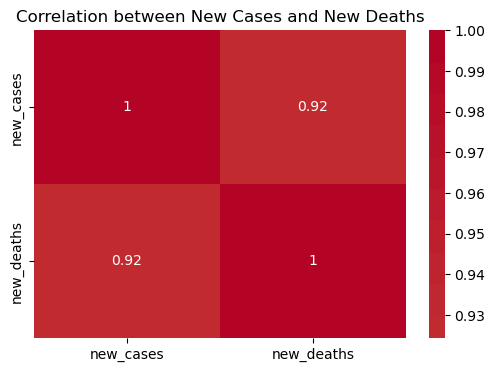

Correlation between new_cases and new_deaths: 0.9243149260861852


In [290]:
covid_data = pd.DataFrame(df)

# Calculate the correlation between new cases and new deaths
correlation_matrix = covid_data[['new_cases', 'new_deaths']].corr()

# Create a heatmap for correlation visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between New Cases and New Deaths')
plt.show()

# Calculate the correlation
correlation = covid_data['new_cases'].corr(covid_data['new_deaths'])
print("Correlation between new_cases and new_deaths:", correlation)

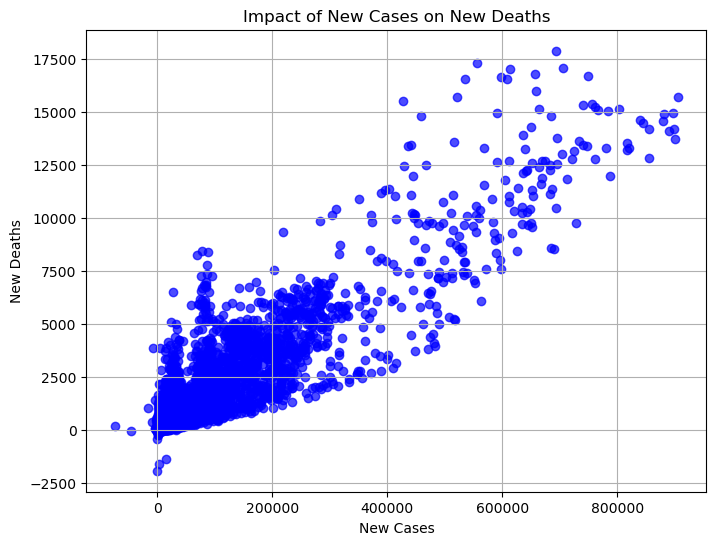

Correlation between new_cases and new_deaths: 0.9243149260861852


In [291]:
covid_data = pd.DataFrame(df)

# Scatter plot of new cases vs new deaths
plt.figure(figsize=(8, 6))
plt.scatter(covid_data['new_cases'], covid_data['new_deaths'], color='blue', alpha=0.7)
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.title('Impact of New Cases on New Deaths')
plt.grid(True)
plt.show()

# Calculate the correlation
correlation = covid_data['new_cases'].corr(covid_data['new_deaths'])
print("Correlation between new_cases and new_deaths:", correlation)


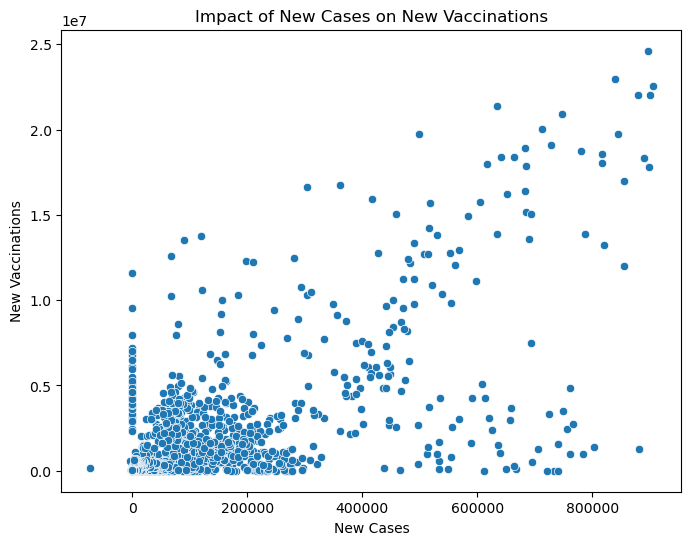

Correlation between new_cases and new_vaccinations: 0.7351668160848096


In [289]:
covid_data = pd.DataFrame(df)

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=covid_data, x='new_cases', y='new_vaccinations')
plt.title('Impact of New Cases on New Vaccinations')
plt.xlabel('New Cases')
plt.ylabel('New Vaccinations')
plt.show()

# Calculate the correlation
correlation = covid_data['new_cases'].corr(covid_data['new_vaccinations'])
print("Correlation between new_cases and new_vaccinations:", correlation)

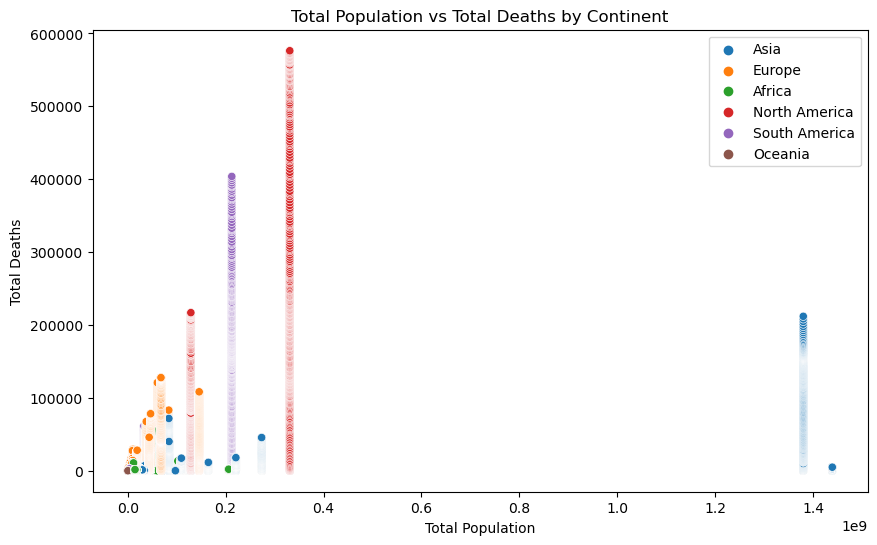

Continent with the maximum deaths: Europe
Population of India: 1380004385.0


In [299]:
covid_data = pd.DataFrame(df)

# Calculate total deaths for each continent
total_deaths_per_continent = covid_data.groupby('continent')['total_deaths'].sum()

# Find the continent with the maximum deaths
continent_with_max_deaths = total_deaths_per_continent.idxmax()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_data, x='population', y='total_deaths', hue='continent')
plt.title('Total Population vs Total Deaths by Continent')
plt.xlabel('Total Population')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

print("Continent with the maximum deaths:", continent_with_max_deaths)

In [239]:
top_countries=['India','United Kingdom','United States','South Africa']

In [240]:
# Calculate the rolling average
data['moving_avg'] = data.groupby(by=['location'])['new_cases'].rolling(window=7, min_periods=1).mean().reset_index(drop=True)

<Axes: xlabel='date', ylabel='moving_avg'>

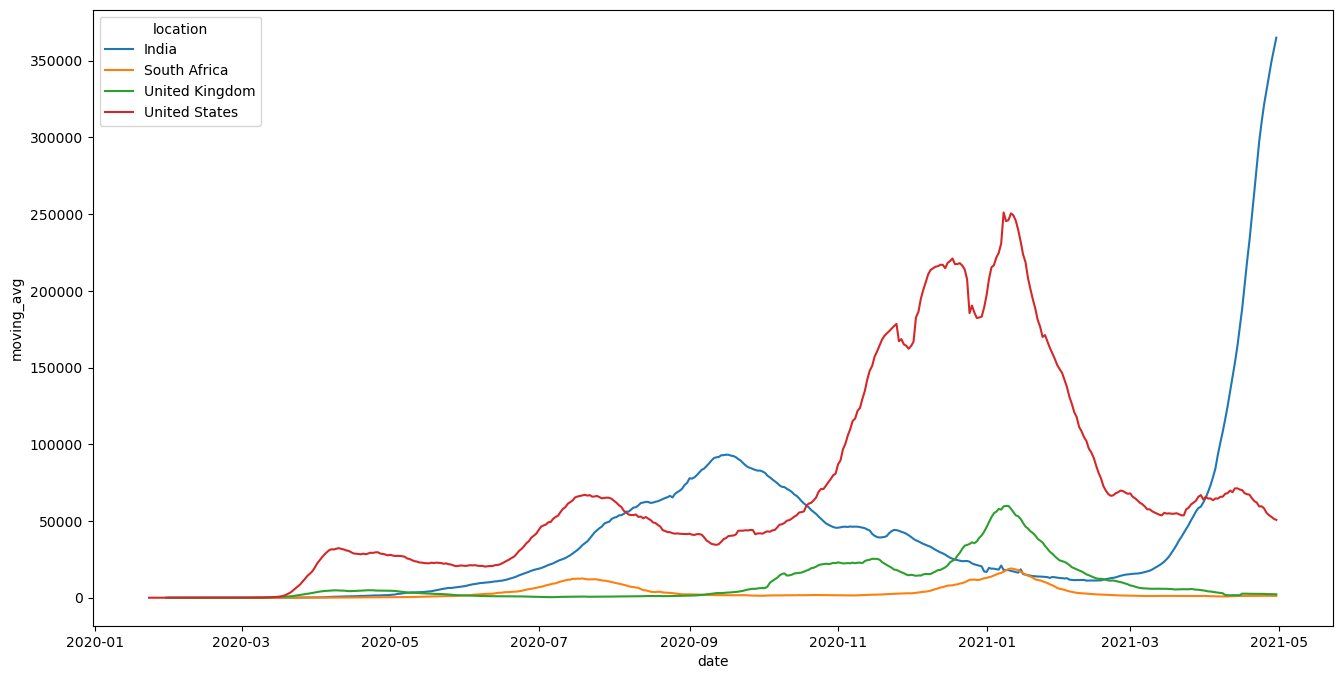

In [241]:
fig= plt.subplots(figsize=(16,8), nrows=1, ncols=1)
sns.lineplot(data=data[data['location'].isin(top_countries)], x='date', y='moving_avg', hue='location')

In [242]:
# Select Indian COVID data
india_covid = data[data['location'] == 'India']
india_covid.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,icu_patients,hosp_patients,new_tests,total_tests,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,moving_avg
35021,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,1.000000
35022,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.500000
35023,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.333333
35024,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.500000
35025,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.600000


In [243]:
india_covid.shape

(457, 24)

In [244]:
india_covid.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
new_cases                  0
total_deaths              41
icu_patients             457
hosp_patients            457
new_tests                 67
total_tests               58
total_vaccinations       355
people_vaccinated        355
population                 0
population_density         0
median_age                 0
aged_65_older              0
aged_70_older              0
gdp_per_capita             0
extreme_poverty            0
cardiovasc_death_rate      0
diabetes_prevalence        0
female_smokers             0
male_smokers               0
moving_avg                 0
dtype: int64

In [245]:
cols_to_drop = ['icu_patients', 'hosp_patients']

# Drop the specified columns
india_covid.drop(columns=cols_to_drop, inplace=True)

In [246]:
india_covid.isnull().sum()

continent                  0
location                   0
date                       0
total_cases                0
new_cases                  0
total_deaths              41
new_tests                 67
total_tests               58
total_vaccinations       355
people_vaccinated        355
population                 0
population_density         0
median_age                 0
aged_65_older              0
aged_70_older              0
gdp_per_capita             0
extreme_poverty            0
cardiovasc_death_rate      0
diabetes_prevalence        0
female_smokers             0
male_smokers               0
moving_avg                 0
dtype: int64

In [247]:
icovid = india_covid.fillna(0)

In [248]:
icovid.isnull().sum()

continent                0
location                 0
date                     0
total_cases              0
new_cases                0
total_deaths             0
new_tests                0
total_tests              0
total_vaccinations       0
people_vaccinated        0
population               0
population_density       0
median_age               0
aged_65_older            0
aged_70_older            0
gdp_per_capita           0
extreme_poverty          0
cardiovasc_death_rate    0
diabetes_prevalence      0
female_smokers           0
male_smokers             0
moving_avg               0
dtype: int64

In [249]:
icovid.describe()

,total_cases,new_cases,total_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,moving_avg
count,4.570000e+02,457.000000,457.000000,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,457.000,4.570000e+02,457.000,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,457.000000
mean,5.519123e+06,41936.474836,80039.702407,6.149212e+05,8.920917e+07,9.781668e+06,8.393965e+06,1.380004e+09,4.504190e+02,2.820000e+01,5.989,3.414000e+00,6426.674,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,39453.270720
std,5.125935e+06,62769.787433,67774.518201,4.865678e+05,9.209895e+07,2.845031e+07,2.432890e+07,0.000000e+00,1.138114e-13,3.556607e-15,0.000,4.445759e-16,0.000,3.556607e-15,1.138114e-13,1.778304e-15,2.222879e-16,3.556607e-15,56099.540794
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.380004e+09,4.504190e+02,2.820000e+01,5.989,3.414000e+00,6426.674,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,0.000000
25%,1.314230e+05,6147.000000,3868.000000,9.291100e+04,2.512388e+06,0.000000e+00,0.000000e+00,1.380004e+09,4.504190e+02,2.820000e+01,5.989,3.414000e+00,6426.674,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5825.000000
50%,4.930236e+06,22065.000000,80776.000000,7.256530e+05,5.409798e+07,0.000000e+00,0.000000e+00,1.380004e+09,4.504190e+02,2.820000e+01,5.989,3.414000e+00,6426.674,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,20615.142857
75%,1.039528e+07,54044.000000,150336.000000,1.032795e+06,1.756358e+08,0.000000e+00,0.000000e+00,1.380004e+09,4.504190e+02,2.820000e+01,5.989,3.414000e+00,6426.674,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,53797.857143
max,1.916497e+07,401993.000000,211853.000000,1.920107e+06,2.863921e+08,1.519981e+08,1.253770e+08,1.380004e+09,4.504190e+02,2.820000e+01,5.989,3.414000e+00,6426.674,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,364926.857143


In [250]:
icovid.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,moving_avg
35021,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,1.000000
35022,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.500000
35023,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.333333
35024,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.500000
35025,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.600000


In [251]:
index = icovid[icovid['location']=='India'].index
inc = icovid.loc[index, 'date' :'total_cases']
inc.set_index('date',inplace=True)
inc.head(10)

,total_cases
date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0
2020-02-04,3.0
2020-02-05,3.0
2020-02-06,3.0
2020-02-07,3.0


<Axes: xlabel='date'>

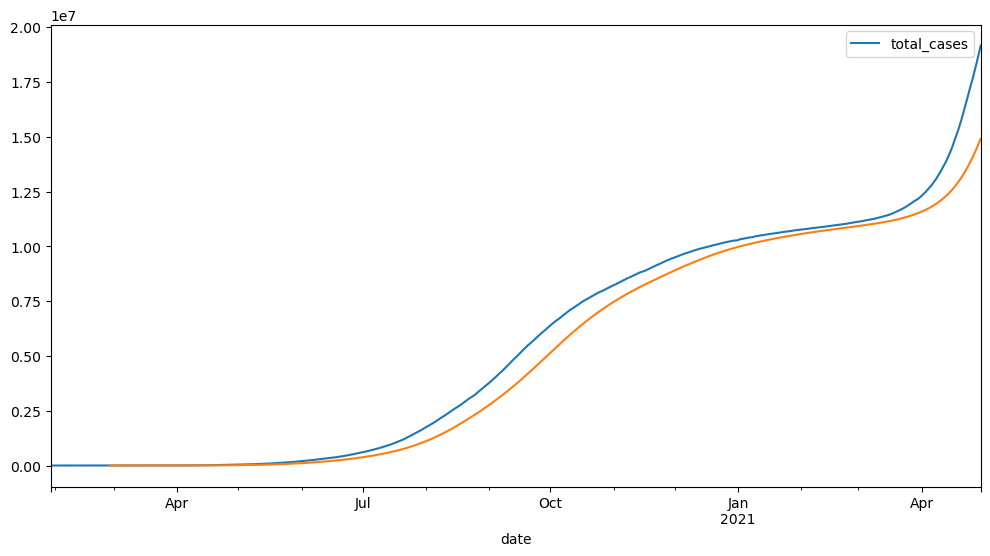

In [252]:
inc.plot(figsize=(12,6))
inc.rolling(window=30).mean()['total_cases'].plot()

**Above graph shows two lines Moving Average(Orange) and total cases(Blue).
It shows that covid-19 new cases growth is above average,which is extremly bad.**

Correlation Coefficient: 0.9903362585577034


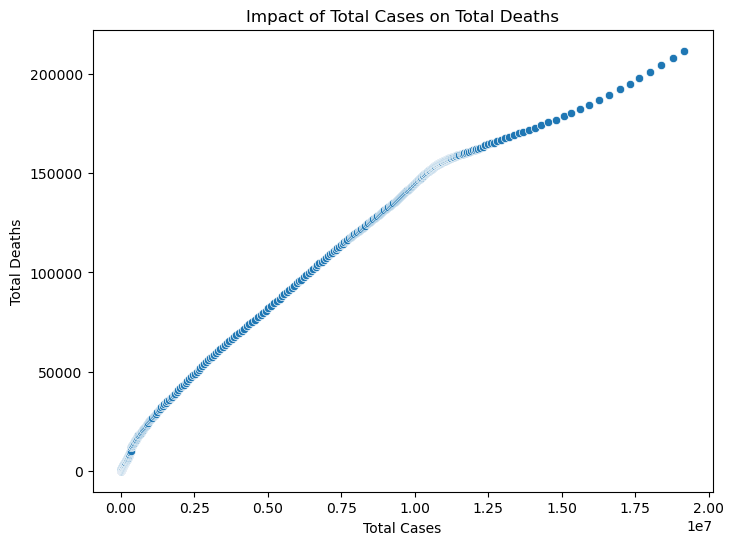

In [279]:
covid_data = pd.DataFrame(icovid)

# Calculate the correlation coefficient
correlation_coefficient = covid_data['total_cases'].corr(covid_data['total_deaths'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=covid_data, x='total_cases', y='total_deaths')
plt.title('Impact of Total Cases on Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')

# Display correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

plt.show()

In [321]:
india_population = df[df['location'] == 'India']['population']
print("Population of India:", india_population.values[0])

Population of India: 1380004385.0


In [322]:
icovid.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,moving_avg
35021,Asia,India,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,1.000000
35022,Asia,India,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.500000
35023,Asia,India,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.333333
35024,Asia,India,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.500000
35025,Asia,India,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,0.600000


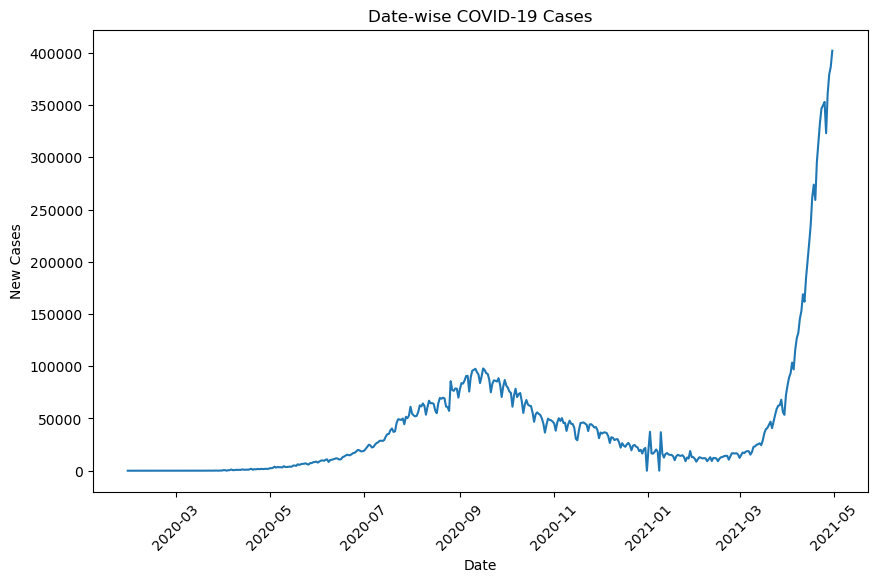

In [323]:
covid_data = pd.DataFrame(icovid)

# Convert 'date' column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data, x='date', y='new_cases')
plt.title('Date-wise COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.show()

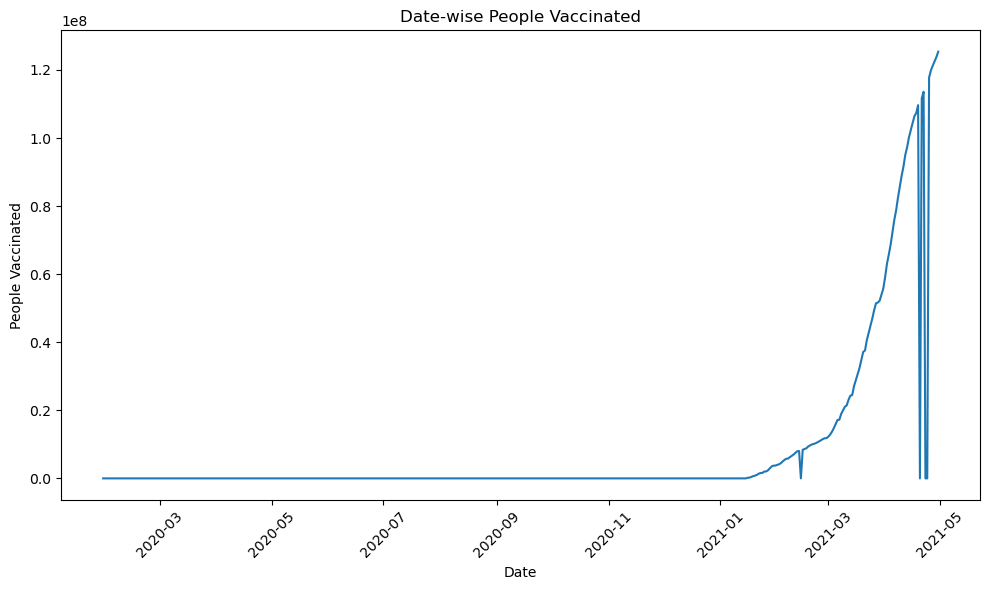

In [328]:
covid_vaccinations = pd.DataFrame(icovid)

# Convert 'date' column to datetime format
covid_vaccinations['date'] = pd.to_datetime(covid_vaccinations['date'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_vaccinations, x='date', y='people_vaccinated')
plt.title('Date-wise People Vaccinated')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

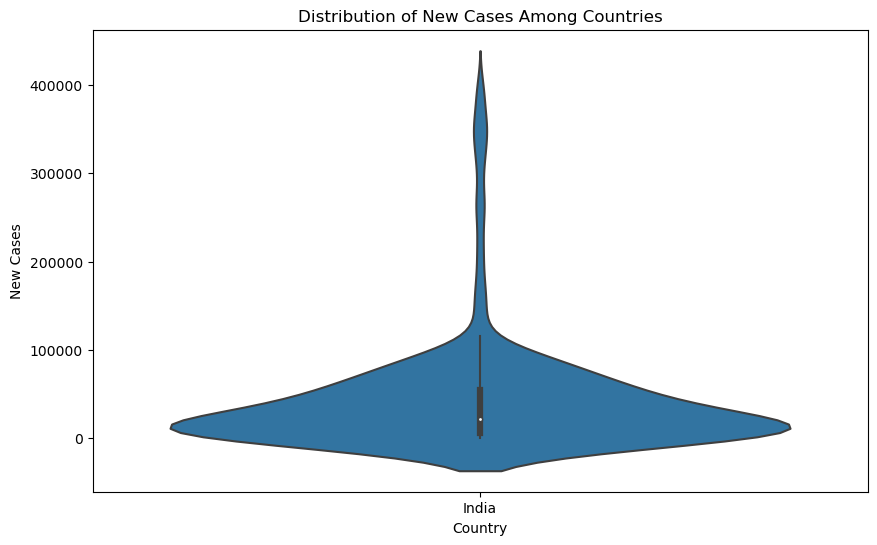

In [331]:
covid_data = pd.DataFrame(icovid)

# Create a violin plot for new cases distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=covid_data, x='location', y='new_cases')
plt.title('Distribution of New Cases Among Countries')
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.show()


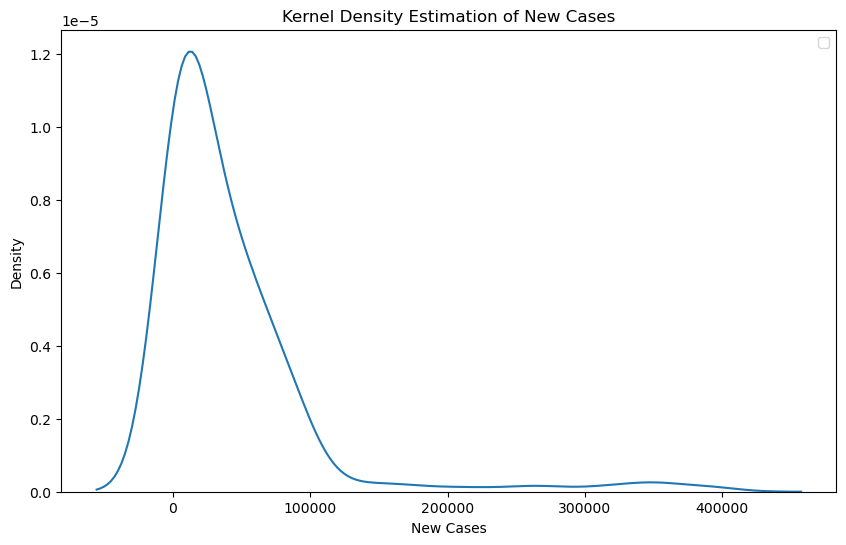

In [332]:
# Create a KDE plot for new cases distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=icovid, x='new_cases', hue='location', common_norm=False)
plt.title('Kernel Density Estimation of New Cases')
plt.xlabel('New Cases')
plt.ylabel('Density')
plt.legend()
plt.show()

In [335]:
icovid.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_tests', 'total_tests', 'total_vaccinations',
       'people_vaccinated', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'moving_avg'],
      dtype='object')

/tmp/ipykernel_33/523854322.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




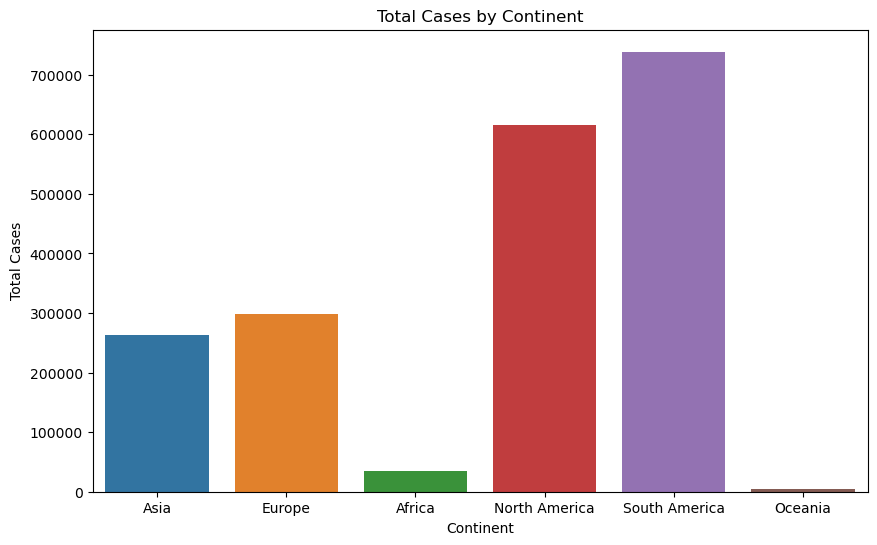

In [343]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='continent', y='total_cases', ci=None)
plt.title('Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()
